# Linear Programming
Linear programming is a set of techniques used in mathematical programming, sometimes called mathematical optimization, to solve systems of linear equations and inequalities while maximizing or minimizing some linear function. It’s important in fields like scientific computing, economics, technical sciences, manufacturing, transportation, military, management, energy, and so on.

## What Is Linear Programming?
Imagine that you have a system of linear equations and inequalities. Such systems often have many possible solutions. Linear programming is a set of mathematical and computational tools that allows you to find a particular solution to this system that corresponds to the maximum or minimum of some other linear function.

## What Is Mixed-Integer Linear Programming?
Mixed-integer linear programming is an extension of linear programming. It handles problems in which at least one variable takes a discrete integer rather than a continuous value. Although mixed-integer problems look similar to continuous variable problems at first sight, they offer significant advantages in terms of flexibility and precision.

Integer variables are important for properly representing quantities naturally expressed with integers, like the number of airplanes produced or the number of customers served.

A particularly important kind of integer variable is the binary variable. It can take only the values zero or one and is useful in making yes-or-no decisions, such as whether a plant should be built or if a machine should be turned on or off. You can also use them to mimic logical constraints.

## Why Is Linear Programming Important?
Linear programming is a fundamental optimization technique that’s been used for decades in science- and math-intensive fields. It’s precise, relatively fast, and suitable for a range of practical applications.

Mixed-integer linear programming allows you to overcome many of the limitations of linear programming. You can approximate non-linear functions with piecewise linear functions, use semi-continuous variables, model logical constraints, and more. It’s a computationally intensive tool, but the advances in computer hardware and software make it more applicable every day.

Often, when people try to formulate and solve an optimization problem, the first question is whether they can apply linear programming or mixed-integer linear programming.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Linear Programming Example
  
maximize: <br>
    $ z = x + 2y \tag{1} $ <br> <br>
subject to: <br>
    $  2x +  y \leq 20  \tag{2} $ <br> 
    $ -4x + 5y \leq 10 \tag{3} $ <br>
    $ -x + 2y \geq -2 \tag{4} $ <br>
    $ x \geq 0 \tag{5} $ <br>
    $ y \geq 0 \tag{6} $ <br>
    


You need to find x and y such that the inequalities, (2), (3), (4) as well as the inequalities(5) and (6), are satisfied. At the same time, your solution must correspond to the largest possible value of z.

The independent variables you need to find—in this case **x and y** are called the **decision variables**. The function of the decision variables to be maximized or minimized—in this case **z** is called the **objective function, the cost function, or just the goal**. The **inequalities you need to satisfy** are called the **inequality constraints**. You can also have equations among the constraints called equality constraints.

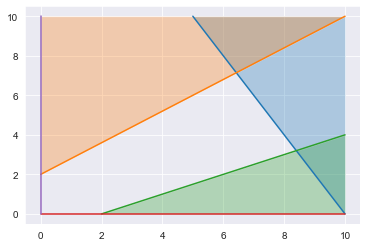

In [2]:
fig, ax = plt.subplots()

pts = np.linspace(0, 10, 100)

x = np.linspace(5, 10, 100); ax.plot(x, 20-2*x) # 2x + y = 20
ax.fill_between(x, 20-2*x, 10, alpha=0.3)
x = np.linspace(0, 10, 100); ax.plot(x, (10+(4*x))/5) # -4x + 5y = 10
ax.fill_between(x, (10+(4*x))/5, 10, alpha=0.3)
x = np.linspace(2, 10, 100); ax.plot(x, (x-2)/2) # -x + 2y = -2
ax.fill_between(x, 0, (x-2)/2, alpha=0.3)

ax.plot(pts, np.zeros(100)) # x = 0
ax.plot(np.zeros(100), pts); # y = 0

The shaded areas shows where the corresponding colored inequalities are not satisfied. If you disregard the shaded areas, only the gray area remains. Each point of the gray area satisfies all constraints and is a potential solution to the problem. This area is called the **feasible region**, and its points are **feasible solutions**. In this case, there’s an infinite number of feasible solutions.

You want to maximize z. The feasible solution that corresponds to maximal z is the **optimal solution**. If you were trying to minimize the objective function instead, then the optimal solution would correspond to its feasible minimum.

Note that z is linear. You can imagine it as a plane in three-dimensional space. This is why the optimal solution must be on a vertex, or corner, of the feasible region.

Sometimes a whole edge of the feasible region, or even the entire region, can correspond to the same value of z. In that case, you have many optimal solutions.

This example illustrates **feasible linear programming problem** because it has **bounded feasible regions and finite solutions**

## Infeasible Linear Programming Problem
A linear programming problem is infeasible if it doesn’t have a solution. This usually happens when no solution can satisfy all constraints at once.

For example, consider what would happen if you added the constraint x + y ≤ −1. Then at least one of the decision variables (x or y) would have to be negative. This is in conflict with the given constraints x ≥ 0 and y ≥ 0. Such a system doesn’t have a feasible solution, so it’s called infeasible.

## Unbounded Linear Programming Problem
A linear programming problem is unbounded if its feasible region isn’t bounded and the solution is not finite. This means that at least one of your variables isn’t constrained and can reach to positive or negative infinity, making the objective infinite as well.

For example, say you take the initial problem above and drop the (2) and (4) constraints. Dropping constraints out of a problem is called relaxing the problem. In such a case, x and y wouldn’t be bounded on the positive side. You’d be able to increase them toward positive infinity, yielding an infinitely large z value.

# Linear Programming Python Implementation


In [3]:
from scipy.optimize import linprog

linprog() solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization:
* Instead of maximizing z = x + 2y, you can minimize its negative(−z = −x − 2y).
* Instead of having the greater than or equal to sign, you can multiply the (4) inequality by −1 and get the opposite less than or equal to sign (≤).

Let's add one more constraint

    -x +5y = 15

minimize: <br>
    $ -z = -x - 2y \tag{1} $ <br> <br>
subject to: <br>
    $  2x +  y \leq 20  \tag{2} $ <br> 
    $ -4x + 5y \leq 10 \tag{3} $ <br>
    $ x - 2y \leq 2 \tag{4} $ <br>
    $ -x + 5y = 15 \tag{5} $ <br>
    $ x \geq 0 \tag{6} $ <br>
    $ y \geq 0 \tag{7} $ <br>

In [4]:
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  
            [-4,  5],  
            [ 1, -2]] 

rhs_ineq = [20, 
            10,  
             2]  

lhs_eq = [[-1, 5]] 
rhs_eq = [15] 

You put the values from the system above into the appropriate lists, tuples, or NumPy arrays:

* obj holds the coefficients from the objective function.
* lhs_ineq holds the left-side coefficients from the inequality (red, blue, and yellow) constraints.
* rhs_ineq holds the right-side coefficients from the inequality (red, blue, and yellow) constraints.
* lhs_eq holds the left-side coefficients from the equality constraint.
* rhs_eq holds the right-side coefficients from the equality constraint.

The next step is to define the bounds for each variable in the same order as the coefficients. In this case, they’re both between zero and positive infinity:

In [5]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

Finally, it’s time to optimize and solve your problem of interest.

In [6]:
opt = linprog(
    c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
    A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd, 
    method="revised simplex"
)
opt

     con: array([1.77635684e-15])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

You can use the parameter method to define the linear programming method that you want to use. There are three options:

* method="interior-point" selects the interior-point method. This option is set by default.
* method="revised simplex" selects the revised two-phase simplex method.
* method="simplex" selects the legacy two-phase simplex method.

linprog() returns a data structure with these attributes:
* .con is the equality constraints residuals.
* .fun is the objective function value at the optimum (if found).
* .message is the status of the solution.
* .nit is the number of iterations needed to finish the calculation.
* .slack is the values of the slack variables, or the differences between the values of the left and right sides of the constraints.
* .status is an integer between 0 and 4 that shows the status of the solution, such as 0 for when the optimal solution has been found.
* .success is a Boolean that shows whether the optimal solution has been found.
* .x is a NumPy array holding the optimal values of the decision variables.

## Another Example

maximize: <br>
    $ z = 20x_{1} + 12x_{2} + 40x_{3} + 25x_{4} \tag{1} $ <br> <br>
subject to: <br>
    $  x_{1} + x_{2} + x_{3} + x_{4} \leq 50  \tag{2} $ <br> 
    $  3x_{1} + 2x_{2} + x_{3} \leq 100  \tag{3} $ <br> 
    $  x_{2} + 2x_{3} + 3x_{4} \leq 90  \tag{4} $ <br> 
    $ x_{1}, x_{2}, x_{3}, x_{4} \geq 0 \tag{5} $ <br>

In [7]:
def solve_lpp(constraints, objective, direction, col_names):
    """
        solves an lpp using scipy
        parameters:
            constraints: pandas.DataFrame with row representing a constraint
            objective: string of comma separated coefficients in the objective function
            direction: minimize or maximize the objective function
            col_names: dictionary: {
                coeff: list of column names forming the LHS
                dir: name of inequality or equality column
                rhs: name of RHS column
            }
    """
    coeff_cols = col_names['coeff']
    dir_col = col_names['dir']
    rhs_col = col_names['rhs']
    
    
    for idx in constraints[(constraints[dir_col] == '>=') | (constraints[dir_col] == '>=')].index:
        constraints.loc[idx,coeff_cols] *= -1
        constraints.loc[idx, dir_col] = constraints.loc[idx, dir_col].replace('>', '<')
        constraints.loc[idx, rhs_col] *= -1
        
    objective = list(map(float, objective.split(',')))
    if direction == 'maximize':
        objective = list(map(lambda x: -1*x, objective))    
        
    obj = objective

    lhs_ineq = constraints[constraints[dir_col].isin(['<', '<='])][coeff_cols].values

    rhs_ineq = constraints[constraints[dir_col].isin(['<', '<='])][rhs_col].values 

    lhs_eq = constraints[constraints[dir_col] == '='][coeff_cols].values
    rhs_eq = constraints[constraints[dir_col] == '='][rhs_col].values
    
    return linprog(
        c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
        A_eq=lhs_eq, b_eq=rhs_eq,
        method="revised simplex"
    )

In [8]:
constraints = pd.DataFrame([
    [1, 1, 1, 1, '<=', 50],
    [3, 2, 1, 0, '<=', 100],
    [0, -1, -2, -3, '>=', -90],
], columns=['x1', 'x2', 'x3', 'x4', 'direction', 'rhs'])

direction = 'maximize'
objective = '20, 12, 40, 25'

col_names = {
    'coeff': ['x1', 'x2', 'x3', 'x4'],
    'dir': 'direction',
    'rhs': 'rhs'
}

In [9]:
constraints

,x1,x2,x3,x4,direction,rhs
0,1,1,1,1,<=,50
1,3,2,1,0,<=,100
2,0,-1,-2,-3,>=,-90


In [10]:
solve_lpp(constraints, objective, direction, col_names)

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

## Using PuLP

In [11]:
from pulp import LpProblem, LpStatus, lpSum, LpVariable

In [12]:
# Create the model
model = LpProblem(name="small-problem", sense=-1)

You use the sense parameter to choose whether to perform minimization (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1). This choice will affect the result of your problem.

Once that you have the model, you can define the decision variables as instances of the LpVariable class:

In [13]:
# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

* You need to provide a lower bound with lowBound=0 because the default value is negative infinity. 
* The parameter upBound defines the upper bound, but you can omit it here because it defaults to positive infinity.
* The optional parameter cat defines the category of a decision variable. If you’re working with continuous variables, then you can use the default value "Continuous"

In [14]:
# Add the constraints to the model
model += (2 * x + y <= 20, "constraint 1")
model += (4 * x - 5 * y >= -10, "constraint 2")
model += (-x + 2 * y >= -2, "constraint 3")
model += (-x + 5 * y == 15, "constraint 4")

In [15]:
obj_func = x + 2 * y
model += obj_func

In [16]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
constraint_1: 2 x + y <= 20

constraint_2: 4 x - 5 y >= -10

constraint_3: - x + 2 y >= -2

constraint_4: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [17]:
status = model.solve()

In [18]:
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")
for var in model.variables():
    print(f"{var.name}: {var.value()}")
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 16.8181817
x: 7.7272727
y: 4.5454545
constraint_1: -9.99999993922529e-08
constraint_2: 18.181818300000003
constraint_3: 3.3636362999999996
constraint_4: -2.0000000233721948e-07


### Wrapper for LPP of the form AX <= b

In [19]:
def solve_lpp_pulp(model_name, A, b, objective):
    """
    Wrapper for LPP of the form AX <= b
    
        model_name: string
        A = Matrix of shape n x m, where n = num of constraints, m = num of variables
        b = Vector of length n
        objective = Vector of length m+1
    """
    n, m = A.shape
    model = LpProblem(name=model_name, sense=-1)
    X = [LpVariable(name=f"x_{i+1}", lowBound=0) for i in range(m)]
    for i in range(n):
        model += eval(" + ".join(f"A[{i}][{j}] * X[{j}]" for j in range(len(X))) + " <= " + f"b[{i}]")
    model += eval(" + ".join(f"objective[{i}] * X[{i}]" for i in range(len(X))) + " + objective[-1]")
    model.solve()
    result = {
        'Status': LpStatus[model.status],
        'Objective': model.objective.value(),
    }    

    result_var = {var.name: var.value() for var in model.variables()}
    result_slack = {name: constraint.value() for name, constraint in model.constraints.items()}
    
    return {**result, **result_var, **result_slack}

In [20]:
Ab = pd.DataFrame(
    [[1, 1, 1, 1, 50],
    [3, 2, 1, 0, 100],
    [0, 1, 2, 3, 90]],
    columns = ['x1', 'x2', 'x3', 'x4', 'rhs']
) 
Ab

,x1,x2,x3,x4,rhs
0,1,1,1,1,50
1,3,2,1,0,100
2,0,1,2,3,90


In [21]:
A = Ab.iloc[:, :-1].values
b = Ab.iloc[:, -1].values.reshape(-1, 1)
objective = [20, 12, 40, 25, 1]
solve_lpp_pulp('demo', A, b, objective)

{'Status': 'Optimal',
 'Objective': 1901.0,
 'x_1': 5.0,
 'x_2': 0.0,
 'x_3': 45.0,
 'x_4': 0.0,
 '_C1': 0.0,
 '_C2': -40.0,
 '_C3': 0.0}

# Linear Fractional Programming

In mathematical optimization, linear-fractional programming (LFP) is a generalization of linear programming (LP). Whereas the objective function in a linear program is a linear function, the objective function in a linear-fractional program is a ratio of two linear functions. A linear program can be regarded as a special case of a linear-fractional program in which the denominator is the constant function one.

Formally, a linear-fractional program is defined as the problem of maximizing (or minimizing) a ratio of affine functions over a polyhedron

\begin{aligned}{\text{maximize}}\quad &{\frac {\mathbf {c} ^{T}\mathbf {x} +\alpha }{\mathbf {d} ^{T}\mathbf {x} +\beta }}\\{\text{subject to}}\quad &A\mathbf {x} \leq \mathbf {b} ,\end{aligned}

where $ {x} \in  {R} ^{n} $ represents the vector of variables to be determined, $ {c} , {d} \in  {R} ^{n} $ are vectors of (known) coefficients, $ A\in  {R} ^{m\times n} $ is a (known) matrix of coefficients and $ \alpha ,\beta \in  {R} $  are constants. The constraints have to restrict the feasible region to { $ {x} | {d} ^{T}  {x} +\beta >0 $ }, i.e. the region on which the denominator is positive. Alternatively, the denominator of the objective function has to be strictly negative in the entire feasible region.

## Transformation to a linear program
Under the assumption that the feasible region is non-empty and bounded,

Transformation of objective function
$ Z = (c ^{T} - d ^{T} \frac{\alpha}{\beta}) y + \frac{\alpha}{\beta} \tag{1} $

Transformation of constraints
$ A + \frac{1}{\beta} b d^{T} \leq \frac{1}{\beta} b \tag{2} $

where,

$ y = \frac{x}{d^{T}x + \beta} \tag{3} $
therefore,
$ x = \beta \frac{y}{1 - d^{T}y} \tag{4} $

Reference: [Solving LFP by Converting it into a Single LP ](http://www.orstw.org.tw/ijor/vol8no3/1-Vol_8,%20No.%203,%20pp.1-14.pdf)

In [22]:
def solve_lfp_pulp(model_name, Ab, c, d, alpha, beta):
    """
    Solves LFP problem by tranforming it to LPP
    
    Z = max (c_t * x + alpha) / (d_t * x + beta)
    subjected to constraints: A*x < b
    
        model_name: string
        Ab: DataFrame [A:b] of shape n x m+1, where n = num of constraints, m = num of variables
        c, d: Vectors of length m
        alpha, beta: float
    """
    A = Ab.iloc[:, :-1].values
    b = Ab.iloc[:, -1].values.reshape(-1, 1)
    c_t = np.array(c).reshape(-1, 1).T
    d_t = np.array(d).reshape(-1, 1).T
    
    Z = np.append(c_t - (d_t*(alpha/beta)), [alpha/beta])
    A_new = A + ((b @ d_t) / beta)
    b_new = b / beta
    
    results = solve_lpp_pulp(model_name, A_new, b_new, Z)
    m = A.shape[1]
    for i in range(m):
        results[f'y_{i+1}'] = results[f'x_{i+1}']
        results[f'x_{i+1}'] = (results[f'y_{i+1}'] * beta) / (1 - d_t[0][i] * results[f'y_{i+1}'])
    return results

In [23]:
Ab = pd.DataFrame(
    [[4, -2, 20],
    [3, 5, 25],
    [1, 1, 10]],
    columns = ['x1', 'x2', 'rhs']
) 
c = np.array([6, 3])
d = np.array([5, 2])
alpha = 6
beta = 5
Ab

,x1,x2,rhs
0,4,-2,20
1,3,5,25
2,1,1,10


In [24]:
solve_lfp_pulp('LFP', Ab, c, d, alpha, beta)

{'Status': 'Optimal',
 'Objective': 1.399999998,
 'x_1': 0.0,
 'x_2': 4.999999850000002,
 '_C1': -2.00000002,
 '_C2': -5.000000058430487e-08,
 '_C3': -0.3333333500000002,
 'y_1': 0.0,
 'y_2': 0.33333333}